In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [2]:
dfAccidents = pd.read_csv('Data/NYPD_Motor_Vehicle_Collisions.csv')

C:\Users\p_sum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfAccidents.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/17/2018,0:00,BROOKLYN,11201,40.700700,-73.988690,"(40.7007, -73.98869)",PROSPECT STREET,ADAMS STREET,NaN,...,Unspecified,NaN,NaN,NaN,3864343,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,03/17/2018,0:00,BROOKLYN,11207,40.657180,-73.884470,"(40.65718, -73.88447)",NaN,NaN,243 WORTMAN AVENUE,...,Unspecified,NaN,NaN,NaN,3865549,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN
2,03/17/2018,0:00,BROOKLYN,11215,40.670177,-73.990140,"(40.670177, -73.99014)",NaN,NaN,262 10 STREET,...,Following Too Closely,NaN,NaN,NaN,3865340,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/17/2018,0:00,BROOKLYN,11237,40.703403,-73.917786,"(40.703403, -73.917786)",STANHOPE STREET,WYCKOFF AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3865359,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,03/17/2018,0:00,MANHATTAN,10033,40.850510,-73.931050,"(40.85051, -73.93105)",AUDUBON AVENUE,WEST 184 STREET,NaN,...,NaN,NaN,NaN,NaN,3864974,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [4]:
dfAccidents.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [5]:
dfAccidents.shape

(1228892, 29)

In [6]:
dfAccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228892 entries, 0 to 1228891
Data columns (total 29 columns):
DATE                             1228892 non-null object
TIME                             1228892 non-null object
BOROUGH                          878081 non-null object
ZIP CODE                         877987 non-null object
LATITUDE                         1012814 non-null float64
LONGITUDE                        1012814 non-null float64
LOCATION                         1012814 non-null object
ON STREET NAME                   988089 non-null object
CROSS STREET NAME                920230 non-null object
OFF STREET NAME                  192997 non-null object
NUMBER OF PERSONS INJURED        1228892 non-null int64
NUMBER OF PERSONS KILLED         1228892 non-null int64
NUMBER OF PEDESTRIANS INJURED    1228892 non-null int64
NUMBER OF PEDESTRIANS KILLED     1228892 non-null int64
NUMBER OF CYCLIST INJURED        1228892 non-null int64
NUMBER OF CYCLIST KILLED         1228892

In [7]:
dfAccidents['DATENew'] =pd.to_datetime(dfAccidents['DATE'])
dfAccidents['year'], dfAccidents['month'],dfAccidents['DAY_OF_WEEK']= dfAccidents['DATENew'].apply(lambda x: x.year), dfAccidents['DATENew'].apply(lambda x: x.month), dfAccidents['DATENew'].apply(lambda x: x.weekday())

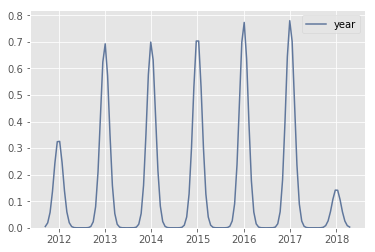

In [8]:
sns.kdeplot(dfAccidents['year'].dropna())

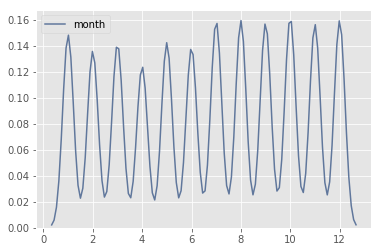

In [10]:
sns.kdeplot(dfAccidents['month'].dropna())

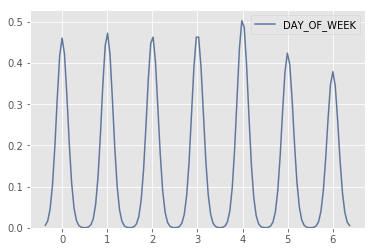

In [11]:
sns.kdeplot(dfAccidents['DAY_OF_WEEK'].dropna())

In [12]:
dfAccidents['TIME'] = pd.to_datetime(dfAccidents['TIME'])
dfAccidents['hour'] =dfAccidents['TIME'].dt.hour

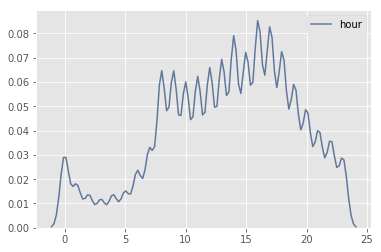

In [13]:
sns.kdeplot(dfAccidents['hour'].dropna())

Join with *Vision Zero* data feeds

In [47]:
import json
from urllib.request import urlopen
import requests
from shapely.geometry import shape, Point

25mph Signal Timing

Priority Corridors where the signal progression has been changed to match the 25 MPH speed
limit

In [48]:
signaltiming = 'http://www.nyc.gov/html/dot/downloads/misc/signal_timing.json'
slowzones = 'http://www.nyc.gov/html/dot/downloads/misc/arterial_slow_zones.json'
#r = requests.get('http://www.nyc.gov/html/dot/downloads/misc/arterial_slow_zones.json')

In [49]:
def loadGeoJson(url):
    response = urlopen(url)
    js = json.loads(response.read())
    return js


In [50]:
signalTimingJs = loadGeoJson(signaltiming)
slowzonesJs = loadGeoJson(slowzones)
threshold = 1e-5

In [51]:
def existsInGeoJson(js, longitude, latitude, threshold):
    point = Point(longitude, latitude)
    # check each polygon to see if it contains the point
    found = False
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.distance(point) < threshold:
            #print ('Found containing polygon:', feature)
            found = True
            break
    return found

In [52]:
print(existsInGeoJson(signalTimingJs, -73.9, 40.723, threshold))

False


In [78]:
dfAccidents['SLOWZONE']=0

def getslowzone(row, threshold):
    retvalue = 0
    if(existsInGeoJson(slowzonesJs, row['LONGITUDE'], row['LATITUDE'], threshold)):
        #print('Found {}'.format(dfAccidents.iloc[i]['LOCATION']))
        #dfAccidents.set_value(i, 'SLOWZONE', 1)
        retvalue = 1
    else:
        retvalue = 0
        #dfAccidents.set_value(i, 'SLOWZONE', 0)
    #print(retvalue)
    return retvalue

In [73]:
#Sample testing
for i in range(0, 1000):
    print(getslowzone(dfAccidents[i:i+1], threshold))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0


In [ ]:
#Now apply to ALL rows.
dfAccidents['SLOWZONE'] = dfAccidents.apply(getslowzone, axis=1, threshold = threshold)

In [ ]:
#How many matched

len(dfAccidents[dfAccidents['SLOWZONE'] == 1])

Lets save what we have got ! ( as the above takes heck a lot of time!!)

In [ ]:
import pickle

In [ ]:
dfAccidents.to_pickle('accidents.pkl')